# In this project I will be looking data set consisting of information on donations to the federal campaign.

1.) How much was donated and what was the average donation?
2.) How did the donations differ between candidates?
3.) How did the donations differ between Democrats and Republicans?
4.) What were the demographics of the donors?
5.) Is there a pattern to donation amounts?

In [1]:

# For data
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

# For visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

from __future__ import division

In [2]:
donor_df = pd.read_csv('C:/Users/27823/Downloads/Election_Donor_Data.csv')

C:\Python27\lib\site-packages\IPython\core\interactiveshell.py:2714: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
donor_df.describe()

,contb_receipt_amt,file_num
count,1.001731e+06,1.001731e+06
mean,2.982352e+02,7.744948e+05
std,3.749667e+03,1.059822e+04
min,-3.080000e+04,7.235110e+05
25%,3.500000e+01,7.719270e+05
50%,1.000000e+02,7.792250e+05
75%,2.500000e+02,7.802340e+05
max,2.014491e+06,7.878030e+05


In [4]:
pd.options.display.float_format = '{:,.2f}'.format

In [5]:
donor_df.describe()

,contb_receipt_amt,file_num
count,"1,001,731.00","1,001,731.00"
mean,298.24,"774,494.84"
std,"3,749.67","10,598.22"
min,"-30,800.00","723,511.00"
25%,35.00,"771,927.00"
50%,100.00,"779,225.00"
75%,250.00,"780,234.00"
max,"2,014,490.51","787,803.00"


In [6]:
#Get overview of dataframe
donor_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001731 entries, 0 to 1001730
Data columns (total 16 columns):
cmte_id              1001731 non-null object
cand_id              1001731 non-null object
cand_nm              1001731 non-null object
contbr_nm            1001731 non-null object
contbr_city          1001712 non-null object
contbr_st            1001727 non-null object
contbr_zip           1001620 non-null object
contbr_employer      988002 non-null object
contbr_occupation    993301 non-null object
contb_receipt_amt    1001731 non-null float64
contb_receipt_dt     1001731 non-null object
receipt_desc         14166 non-null object
memo_cd              92482 non-null object
memo_text            97770 non-null object
form_tp              1001731 non-null object
file_num             1001731 non-null int64
dtypes: float64(1), int64(1), object(14)
memory usage: 122.3+ MB


In [7]:
donor_df.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,"366,010,290.00",RETIRED,RETIRED,250.00,20-JUN-11,NaN,NaN,NaN,SA17A,736166
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,"366,010,290.00",RETIRED,RETIRED,50.00,23-JUN-11,NaN,NaN,NaN,SA17A,736166
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,"368,633,403.00",INFORMATION REQUESTED,INFORMATION REQUESTED,250.00,05-JUL-11,NaN,NaN,NaN,SA17A,749073
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,"724,548,253.00",NONE,RETIRED,250.00,01-AUG-11,NaN,NaN,NaN,SA17A,749073
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,"719,016,467.00",NONE,RETIRED,300.00,20-JUN-11,NaN,NaN,NaN,SA17A,736166


# How much was donated and what was the average donation?

In [8]:
#various donation amounts
donor_df['contb_receipt_amt'].value_counts()

100.00       178188
50.00        137584
25.00        110345
250.00        91182
500.00        57984
2,500.00      49005
35.00         37237
1,000.00      36494
10.00         33986
200.00        27813
20.00         17565
15.00         16163
150.00        14600
75.00         13647
201.20        11718
30.00         11381
300.00        11204
20.12          9897
5.00           9024
40.00          5007
2,000.00       4128
55.00          3760
1,500.00       3705
3.00           3383
60.00          3084
400.00         3066
-2,500.00      2727
110.00         2554
125.00         2520
19.00          2474
              ...  
174.80            1
7.27              1
1,219.00          1
1,884.88          1
162.25            1
218.31            1
78.62             1
203.16            1
53.11             1
499.66            1
19.53             1
188.60            1
47.10             1
19.85             1
28.83             1
202.59            1
-5,500.00         1
9.25              1
202.66            1


In [9]:
#  mean donation
don_mean = donor_df['contb_receipt_amt'].mean()

# std of the donation
don_std = donor_df['contb_receipt_amt'].std()

print 'The average donation was %.2f with a std of %.2f' %(don_mean,don_std)

The average donation was 298.24 with a std of 3749.67


# How did the donations differ between candidates?

In [10]:

top_donor = donor_df['contb_receipt_amt'].copy()


top_donor.sort_values()


top_donor

0            250.00
1             50.00
2            250.00
3            250.00
4            300.00
5            500.00
6            250.00
7            250.00
8            250.00
9            250.00
10           250.00
11           500.00
12           250.00
13           250.00
14           250.00
15           300.00
16           500.00
17         1,000.00
18           250.00
19           300.00
20           500.00
21           250.00
22         2,500.00
23         2,500.00
24           150.00
25           200.00
26           100.00
27           250.00
28           500.00
29           250.00
             ...   
1001701    2,500.00
1001702    2,500.00
1001703   -2,500.00
1001704   -2,500.00
1001705    1,000.00
1001706    2,500.00
1001707   -2,500.00
1001708    2,500.00
1001709   -2,500.00
1001710   -2,500.00
1001711    1,000.00
1001712    2,500.00
1001713    2,500.00
1001714      250.00
1001715      250.00
1001716    1,000.00
1001717      100.00
1001718    2,500.00
1001719    2,500.00


In [11]:
# Remove negative values
top_donor = top_donor[top_donor >0]

# Sort 
top_donor.sort_values()

#  top 10 most common donations value counts
top_donor.value_counts().head(10)

100.00      178188
50.00       137584
25.00       110345
250.00       91182
500.00       57984
2,500.00     49005
35.00        37237
1,000.00     36494
10.00        33986
200.00       27813
Name: contb_receipt_amt, dtype: int64

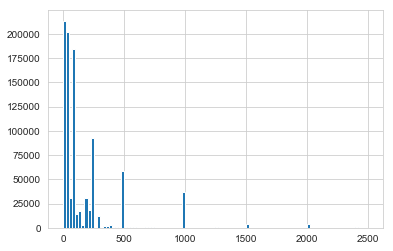

In [12]:
#verify is if donations are usually made in round number amounts
com_don = top_donor[top_donor < 2500]
com_don.hist(bins=100)

# How did the donations differ between Democrats and Republicans

In [13]:
# Grabing Unique
candidates = donor_df.cand_nm.unique()

candidates

array(['Bachmann, Michelle', 'Romney, Mitt', 'Obama, Barack',
       "Roemer, Charles E. 'Buddy' III", 'Pawlenty, Timothy',
       'Johnson, Gary Earl', 'Paul, Ron', 'Santorum, Rick',
       'Cain, Herman', 'Gingrich, Newt', 'McCotter, Thaddeus G',
       'Huntsman, Jon', 'Perry, Rick'], dtype=object)

In [14]:
# Alocation parties
party_map = {'Bachmann, Michelle': 'Republican',
           'Cain, Herman': 'Republican',
           'Gingrich, Newt': 'Republican',
           'Huntsman, Jon': 'Republican',
           'Johnson, Gary Earl': 'Republican',
           'McCotter, Thaddeus G': 'Republican',
           'Obama, Barack': 'Democrat',
           'Paul, Ron': 'Republican',
           'Pawlenty, Timothy': 'Republican',
           'Perry, Rick': 'Republican',
           "Roemer, Charles E. 'Buddy' III": 'Republican',
           'Romney, Mitt': 'Republican',
           'Santorum, Rick': 'Republican'}

# mapping party with candidate
donor_df['Party'] = donor_df.cand_nm.map(party_map)

In [15]:
#removing refunds
donor_df = donor_df[donor_df.contb_receipt_amt >0]

In [16]:
donor_df.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,Party
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,"366,010,290.00",RETIRED,RETIRED,250.00,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,"366,010,290.00",RETIRED,RETIRED,50.00,23-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,"368,633,403.00",INFORMATION REQUESTED,INFORMATION REQUESTED,250.00,05-JUL-11,NaN,NaN,NaN,SA17A,749073,Republican
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,"724,548,253.00",NONE,RETIRED,250.00,01-AUG-11,NaN,NaN,NaN,SA17A,749073,Republican
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,"719,016,467.00",NONE,RETIRED,300.00,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican


In [17]:
#Group candidate and how much they donated
donor_df.groupby('cand_nm')['contb_receipt_amt'].count()

cand_nm
Bachmann, Michelle                 13082
Cain, Herman                       20052
Gingrich, Newt                     46883
Huntsman, Jon                       4066
Johnson, Gary Earl                  1234
McCotter, Thaddeus G                  73
Obama, Barack                     589127
Paul, Ron                         143161
Pawlenty, Timothy                   3844
Perry, Rick                        12709
Roemer, Charles E. 'Buddy' III      5844
Romney, Mitt                      105155
Santorum, Rick                     46245
Name: contb_receipt_amt, dtype: int64

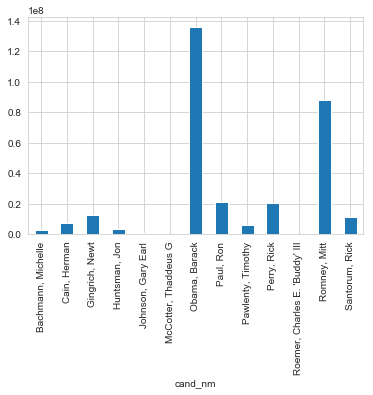

In [18]:
#Creating a dataframe donations
cand_amount = donor_df.groupby('cand_nm')['contb_receipt_amt'].sum()

#Visaulation 
cand_amount.plot(kind='bar')

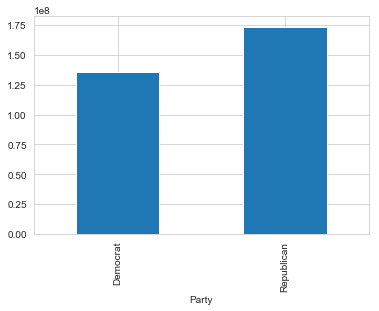

In [19]:
#Democrats vs Repulicans

donor_df.groupby('Party')['contb_receipt_amt'].sum().plot(kind='bar')

In [20]:
#Finding Out people from what occupations donated 

occupation_df = donor_df.pivot_table('contb_receipt_amt',
                                index='contbr_occupation',
                                columns='Party', aggfunc='sum')

In [21]:
occupation_df.head()

Party,Democrat,Republican
contbr_occupation,,
MIXED-MEDIA ARTIST / STORYTELLER,100.00,nan
AREA VICE PRESIDENT,250.00,nan
RESEARCH ASSOCIATE,100.00,nan
TEACHER,500.00,nan
THERAPIST,"3,900.00",nan


In [22]:
#Only wanting people who donated more than a million dollars

occupation_df = occupation_df[occupation_df.sum(1) > 1000000]

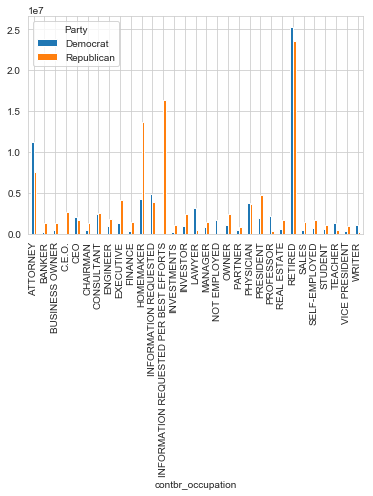

In [23]:
occupation_df.plot(kind='bar')

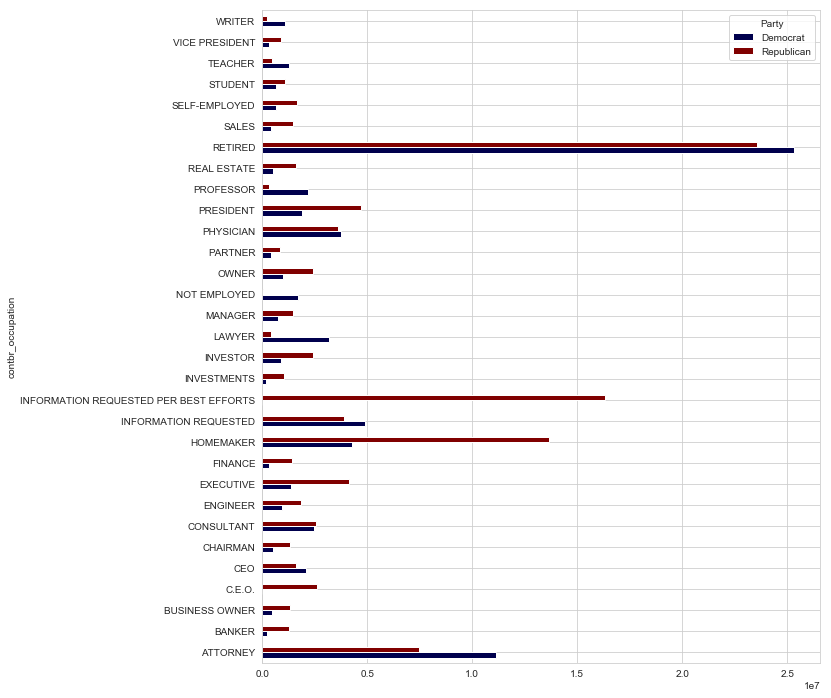

In [24]:
#Changing it to horizonatl

occupation_df.plot(kind='barh',figsize=(10,12),cmap='seismic')

In [25]:
#CLeaning the data by dropping Information Requested per best efforts and combining CEO and C.E.O

occupation_df.drop(['INFORMATION REQUESTED PER BEST EFFORTS','INFORMATION REQUESTED'],axis=0,inplace=True)

occupation_df.loc['CEO'] = occupation_df.loc['CEO'] + occupation_df.loc['C.E.O.']

occupation_df.drop('C.E.O.',inplace=True)

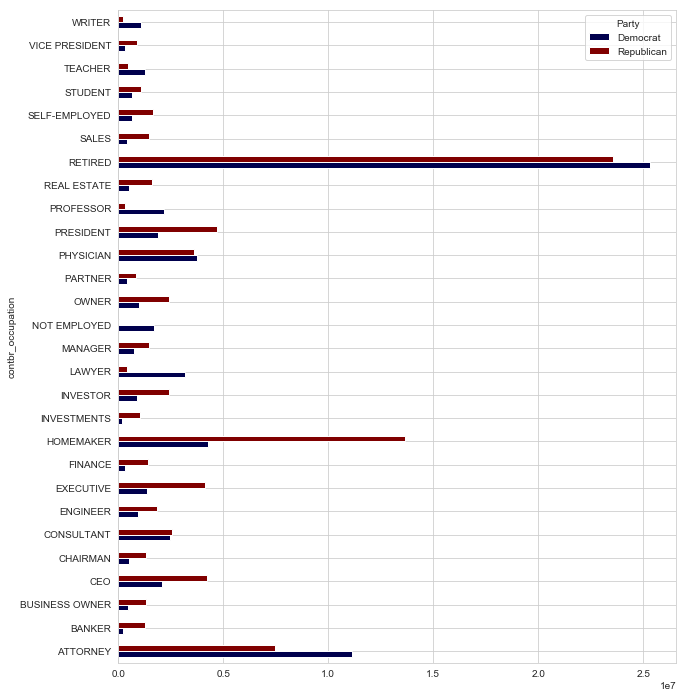

In [26]:
occupation_df.plot(kind='barh',figsize=(10,12),cmap='seismic')